# NFL PBP Data Examples
Simple examples of imports and possible applications of the additional NFL PBP data functions provided in this project

In [10]:
# Import libraries
from utils import *
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from warnings import simplefilter
from datetime import *

# Configure Pandas settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

# Read and flatten fantasy_config.yml
filepath = "fantasy_config.yml"
env = flatten_dict(read_yaml(filepath))

## Enriched PBP Data
Import all PBP data included in nfl-data-py module along with enrichments for fantasy data, PBP lineups, and more

In [4]:
pbp_enrich_df = import_enrich_pbp_data(years=env['seasons'], regular=True)

pbp_enrich_df[pbp_enrich_df['game_id']=='2022_01_PHI_DET'].head(3)

2022 done.
2021 done.
Downcasting floats.
Adding participation data.
Splitting personnel.
Joining split data.
Adding fantasy, team, and other miscellaneous data.


,play_id,game_id,old_game_id_x,home_team,away_team,...,fantasy_pass_twoPointConv_pts,fantasy_pass_pts,posteam_name,posteam_conference,posteam_division
2121,1.00,2022_01_PHI_DET,2022091104,DET,PHI,...,0,0.00,NaN,NaN,NaN
2122,43.00,2022_01_PHI_DET,2022091104,DET,PHI,...,0,0.00,Philadelphia Eagles,NFC,NFC East
2123,58.00,2022_01_PHI_DET,2022091104,DET,PHI,...,0,-0.04,Detroit Lions,NFC,NFC North


## Custom Offensive Aggregations
Import aggregated statistics for players down to the specified level of detail (season, week, half, quarter, or drive)

In [11]:
off_agg_df = import_off_agg_data(env['seasons'], level='season', by='player')

off_agg_df.sort_values(by=['rushing_yards'], ascending=False).head(10)

,player_name,season,player_id,fantasy_rush_pts,fantasy_rec_pts,fantasy_pass_pts,fantasy_total_pts,carries,rushing_yards,rushing_tds,rushing_fumbles,targets,receptions,receiving_yards,receiving_yards_after_catch,receiving_tds,receiving_fumbles,passing_attempts,passing_yards,passing_air_yards,passing_completions,passing_tds,interceptions,sack_fumbles,first_name,last_name,height,weight,years_exp,draft_club,draft_number,age_sos,position,depth_chart_position,jersey_number,posteam_adjusted,offense_player_snaps,offense_team_snaps,st_offense_player_snaps,st_offense_team_snaps,offense_player_snap_pct,st_offense_player_snap_pct,fantasy_overall_rank_season,fantasy_rush_rank_season,fantasy_rec_rank_season,fantasy_pass_rank_season,fantasy_position_rank_season,fantasy_total_pts_nextSeason,fantasy_total_pts_nextSeasonDiff
313,Jonathan Taylor,2021,00-0036223,285.10,88.00,0.00,373.10,332.00,1811.00,18.00,2.00,51.00,40.00,360.00,406.00,2.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jonathan,Taylor,70,221.00,1.00,IND,41.00,22.00,RB,RB,28.00,IND,729.00,1052.00,NaN,236,0.69,NaN,5,1,119,89,1,146.40,226.70
612,Josh Jacobs,2022,00-0035700,219.90,81.90,0.00,301.80,306.00,1539.00,11.00,0.00,56.00,47.00,369.00,348.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joshua,Jacobs,70,220.00,3.00,OAK,24.00,24.00,RB,RB,28.00,LV,689.00,915.00,NaN,199,0.75,NaN,11,1,124,87,3,NaN,NaN
559,Nick Chubb,2022,00-0034791,216.80,41.40,0.00,258.20,290.00,1448.00,12.00,1.00,31.00,22.00,194.00,219.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nicholas,Chubb,71,225.00,4.00,CLE,35.00,26.00,RB,RB,24.00,CLE,588.00,1058.00,NaN,203,0.56,NaN,24,3,206,87,6,NaN,NaN
467,Derrick Henry,2022,00-0032764,216.90,73.90,4.16,294.96,319.00,1429.00,13.00,2.00,40.00,32.00,379.00,362.00,1.00,1.00,2.00,4.00,3.00,2.00,1.00,0.00,0.00,Derrick,Henry,75,247.00,6.00,TEN,45.00,28.00,RB,RB,22.00,TEN,566.00,920.00,NaN,205,0.62,NaN,12,2,139,67,4,NaN,NaN
565,Saquon Barkley,2022,00-0034844,191.20,92.80,0.00,284.00,295.00,1312.00,10.00,0.00,76.00,57.00,338.00,434.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Saquon,Barkley,72,233.00,4.00,NYG,2.00,25.00,RB,RB,26.00,NYG,821.00,1024.00,NaN,216,0.80,NaN,19,4,103,87,5,NaN,NaN
223,Nick Chubb,2021,00-0034791,171.90,43.40,0.00,215.30,228.00,1259.00,8.00,1.00,25.00,20.00,174.00,172.00,1.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nicholas,Chubb,71,225.00,3.00,CLE,35.00,25.00,RB,RB,24.00,CLE,458.00,1053.00,NaN,203,0.43,NaN,61,4,228,89,13,258.20,-42.90
591,Miles Sanders,2022,00-0035243,187.60,25.80,0.00,213.40,248.00,1236.00,11.00,1.00,25.00,20.00,78.00,103.00,0.00,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miles,Sanders,71,211.00,3.00,PHI,53.00,25.00,RB,RB,26.00,PHI,615.00,1052.00,NaN,218,0.58,NaN,46,5,260,87,13,NaN,NaN
168,Joe Mixon,2021,00-0033897,196.50,91.40,0.00,287.90,292.00,1205.00,13.00,1.00,48.00,42.00,314.00,318.00,3.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joe,Mixon,73,220.00,4.00,CIN,48.00,25.00,RB,RB,28.00,CIN,668.00,1046.00,NaN,244,0.64,NaN,22,2,115,89,4,221.70,66.20
381,Najee Harris,2021,00-0036893,162.00,138.70,0.00,300.70,307.00,1200.00,7.00,0.00,94.00,74.00,467.00,499.00,3.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Najee,Harris,73,230.00,0.00,PIT,24.00,23.00,RB,RB,22.00,PIT,929.00,1112.00,NaN,235,0.84,NaN,20,8,64,89,3,191.56,109.14
166,Dalvin Cook,2021,00-0033893,149.90,56.40,0.00,206.30,249.00,1159.00,6.00,2.00,49.00,34.00,224.00,278.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dalvin,Cook,70,210.00,4.00,MIN,41.00,26.00,RB,RB,33.00,MIN,574.00,1082.00,NaN,252,0.53,NaN,68,10,197,89,16,228.70,-22.40


## Sample Plot
Example below uses the above aggregated offensive table to display average fantasy points for rolling bins of the top 40 players in the subsequent season

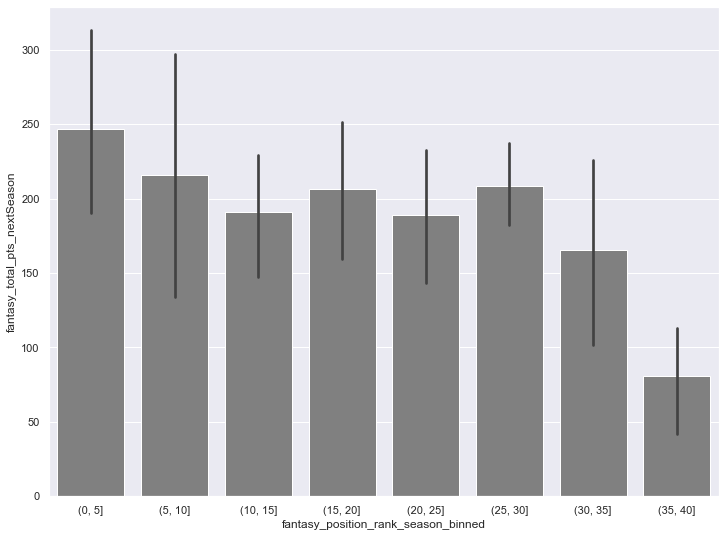

In [12]:
# Set plot parameters
plot_position = 'WR'
plot_x = 'fantasy_position_rank_season'
plot_y = 'fantasy_total_pts_nextSeason'
plot_min_x = 0
plot_max_x = 40
bin_step = 5

binning = True

#=================================================

if binning==True:
    plot_df = column_binner(
        off_agg_df[
            (off_agg_df['position'] == plot_position)& \
            (off_agg_df[plot_x] <= plot_max_x)
        ], 
        plot_x, plot_min_x, plot_max_x, bin_step
    )
    plot_x = plot_x + '_binned'
else:
    plot_df = off_agg_df[(off_agg_df['position']==plot_position)&(off_agg_df[plot_x]<=plot_max_x)]
    
sns.set(rc={'figure.figsize':(12,9)})
plot = sns.barplot(
    data=plot_df, 
    x=plot_x, 
    y=plot_y,
    color='grey'
)